=== Résumé du nettoyage ===
Dimensions initiales: 300000 lignes, 206 colonnes
Dimensions finales: 300000 lignes, 202 colonnes

=== Colonnes problématiques ===

High Missing:
  - abbreviated_product_name: 99.99%
  - generic_name: 98.68%
  - quantity: 84.53%
  - packaging: 96.63%
  - packaging_tags: 96.63%
  - packaging_en: 96.63%
  - packaging_text: 99.79%
  - origins: 98.82%
  - origins_tags: 98.82%
  - origins_en: 98.82%
  - manufacturing_places: 98.69%
  - manufacturing_places_tags: 98.69%
  - labels: 82.34%
  - labels_tags: 82.34%
  - labels_en: 82.34%
  - emb_codes: 99.54%
  - emb_codes_tags: 99.54%
  - first_packaging_code_geo: 99.94%
  - cities: 100.00%
  - cities_tags: 99.94%
  - purchase_places: 97.60%
  - stores: 93.75%
  - allergens: 87.38%
  - allergens_en: 100.00%
  - traces: 98.86%
  - traces_tags: 98.37%
  - traces_en: 98.38%
  - no_nutrition_data: 99.48%
  - additives: 100.00%
  - additives_tags: 64.84%
  - additives_en: 64.84%
  - nutriscore_score: 53.25%
  - nova_group

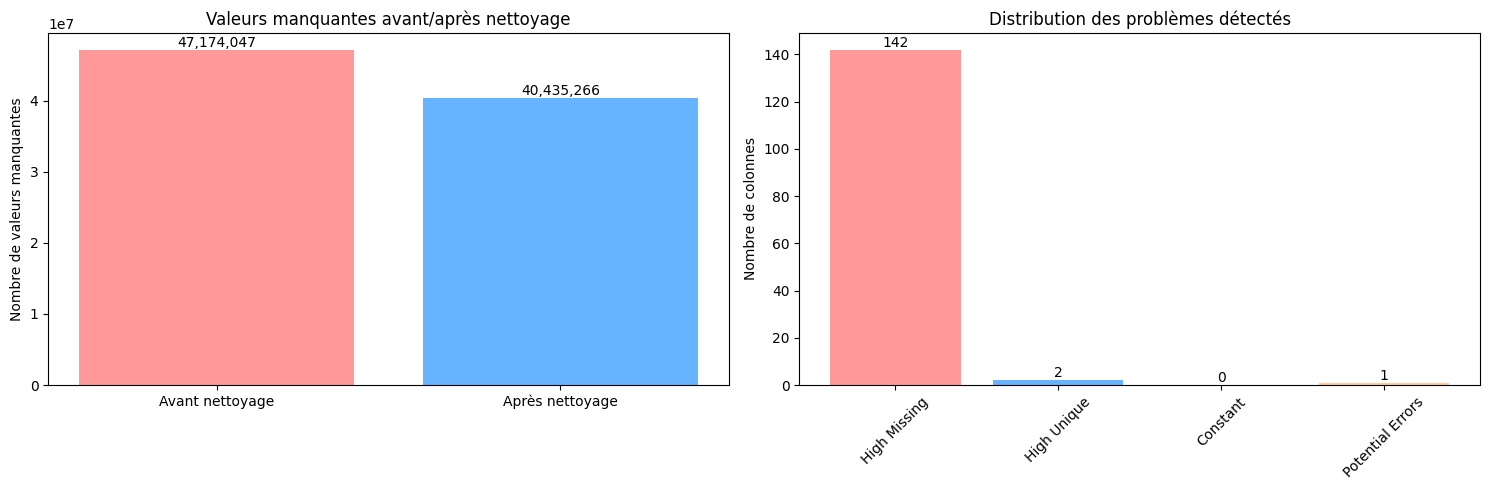

In [1]:
import pandas as pd
from scripts.data.clean_dataset import process_and_analyze_dataset, display_cleaning_summary

# Configuration des types de colonnes
dtypes = {
    'code': str,
    'created_t': 'Int64',
    'last_modified_t': 'Int64',
    'serving_size': str,
    'energy_100g': 'float64',
    'proteins_100g': 'float64',
    'carbohydrates_100g': 'float64',
    'fat_100g': 'float64'
}

# Lecture du fichier
df = pd.read_csv('../data/en.openfoodfacts.org.products.csv',
                 sep='\t',
                 encoding='utf-8',
                 nrows=300000,
                 dtype=dtypes,
                 low_memory=False)

# Nettoyage et analyse
df_clean, info = process_and_analyze_dataset(df)
display_cleaning_summary(info)